In [1]:
import sys
sys.path.append("D:\Desktop\Simulator\simulador-EON-pre-Desastre\simulador")

import networkx as nx
import numpy as np
import pandas as pd
from networkx import Graph
from itertools import islice
import simpy
from VARIAVEIS import *
from EON_SIM import Simulator
from collections import defaultdict
from itertools import combinations


In [2]:
topology = nx.read_weighted_edgelist( "./simulador/topology/"+TOPOLOGY, nodetype=int)

In [3]:
def has_edge_with_any(G:Graph, node, node_list):
    return any(G.has_edge(node, other_node) for other_node in node_list)

In [4]:
def count_edges_with_any(G: Graph, node, node_list):
    return sum(1 for other_node in node_list if G.has_edge(node, other_node))

In [5]:
def randomly_exclude_elements(topology, elements, exclusion_rate, isp_nodes):
    
    isp_nodes :list  = isp_nodes
    for element in elements:
        number_of_edges_with_nodes = count_edges_with_any(topology, element, isp_nodes)
        if number_of_edges_with_nodes >= 1 and np.random.rand() > exclusion_rate-((number_of_edges_with_nodes-1)*0.1):
            isp_nodes.append(element)

    return [element for element in elements if np.random.rand() > exclusion_rate and has_edge_with_any(topology, element, isp_nodes) ]

In [6]:
def edges_between_nodes(G, node_list):
    # Create an empty list to store the edges
    existing_edges = []
    
    # Iterate over all pairs of nodes in node_list
    for node1, node2 in combinations(node_list, 2):
        # Check if an edge exists between node1 and node2
        if G.has_edge(node1, node2):
            existing_edges.append((node1, node2))
    
    return existing_edges

In [7]:
def determine_interssection( topology:Graph, ISP_dict:dict):
    node_intersec_dic = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}
    edge_intersec_dic = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}

    for node in topology.nodes():
        count = 0
        for i, key in enumerate(ISP_dict.keys()):
            if node in ISP_dict[key]["nodes"]:
                count += 1
        node_intersec_dic[count].append(node)

    
    for edge in topology.edges():
        count = 0
        for i, key in enumerate(ISP_dict.keys()):
            if edge in ISP_dict[key]["edges"] or (edge[1], edge[0]) in ISP_dict[key]["edges"]:
                count += 1
        edge_intersec_dic[count].append(edge)

    returndict = {}
    for i in range(len(ISP_dict)+1):
        returndict[i] = {"nodes":node_intersec_dic[i], "edges":edge_intersec_dic[i]}
    
    print(returndict)
    return returndict

In [8]:
def ISP_random_generator(topology: Graph, number_of_ISP):
        
    while True:
        centers = np.random.choice(list(topology.nodes), number_of_ISP, replace=False)
        print(centers)
        isps_dict = {}
        for i, source in enumerate(centers):
            isp_nodes = [source]
            distance_from_each_node = nx.shortest_path_length(topology, source)
            nodes_from_each_distance = defaultdict(list)
            
            for k, v in distance_from_each_node.items():
                nodes_from_each_distance[v].append(k)

            nodes_from_each_distance = dict(nodes_from_each_distance)

            isp_nodes.extend(nodes_from_each_distance[1])
            isp_nodes.extend(nodes_from_each_distance[2])

            aux = randomly_exclude_elements( topology, nodes_from_each_distance[3], 0.70, isp_nodes )
            
            isp_nodes.extend(aux)

            isp_edges = edges_between_nodes(topology, isp_nodes)

            isps_dict[i] = ({"nodes": isp_nodes, "edges": isp_edges})

        if len(determine_interssection(topology, isps_dict )[number_of_ISP-1]["nodes"]) > 0 and len(determine_interssection(topology, isps_dict )[0]["nodes"]) == 0 :
            break
    
    return isps_dict

ISP_dict = ISP_random_generator(topology, 5)
print(ISP_dict)

[14  6 20 15 22]
{0: {'nodes': [], 'edges': []}, 1: {'nodes': [3, 4, 5], 'edges': [(2, 3), (3, 7), (3, 4), (3, 5), (7, 4), (4, 5), (5, 8), (14, 18)]}, 2: {'nodes': [1, 2, 7, 8, 14, 18, 24], 'edges': [(1, 2), (1, 6), (2, 6), (6, 7), (7, 9), (7, 8), (8, 10), (10, 14), (13, 14), (13, 17), (17, 18), (18, 24), (23, 24)]}, 3: {'nodes': [6, 13, 20, 21], 'edges': [(6, 9), (6, 11), (9, 10), (11, 19), (11, 15), (10, 13), (12, 13), (19, 20), (15, 16), (15, 20), (16, 21), (20, 21), (22, 21)]}, 4: {'nodes': [9, 11, 10, 19, 15, 16, 17, 22, 23], 'edges': [(9, 11), (9, 12), (11, 12), (12, 16), (16, 22), (16, 17), (17, 23), (17, 22), (22, 23)]}, 5: {'nodes': [12], 'edges': []}}
{0: {'nodes': [], 'edges': []}, 1: {'nodes': [3, 4, 5], 'edges': [(2, 3), (3, 7), (3, 4), (3, 5), (7, 4), (4, 5), (5, 8), (14, 18)]}, 2: {'nodes': [1, 2, 7, 8, 14, 18, 24], 'edges': [(1, 2), (1, 6), (2, 6), (6, 7), (7, 9), (7, 8), (8, 10), (10, 14), (13, 14), (13, 17), (17, 18), (18, 24), (23, 24)]}, 3: {'nodes': [6, 13, 20, 21]

d:\Desktop\Simulator\simulador-EON-pre-Desastre\.simulador_venv\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


[np.int64(20), 15, 19, 21, 11, 16, 22, 9, 17, 12, 17, 23]


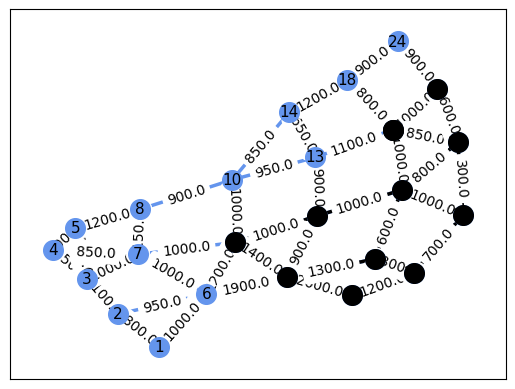

In [9]:
def visao_ISP(pos, topology, ISP_node_list, ISP_edge_list, global_vision=True, weight = False):

    color = (0/255,0/255,0/255)
    blue = (100/255,149/255,237/255)
    
    

    if global_vision:
        nx.draw_networkx_nodes(topology, pos, node_size=200, node_color=blue)    
        nx.draw_networkx_edges(topology, pos, node_size=200, edge_color=blue, width=2.5)
    nx.draw_networkx_nodes(topology, pos, nodelist=ISP_node_list, node_size=200, node_color=color)
    nx.draw_networkx_edges(topology, pos, node_size=200, edgelist=ISP_edge_list, edge_color=color, width=2.5)
    nx.draw_networkx_labels(topology, pos, font_size=11, font_family="sans-serif")

    if weight:
        edge_labels = nx.get_edge_attributes(topology, 'weight')
        nx.draw_networkx_edge_labels(topology, pos, edge_labels=edge_labels)

    print(ISP_node_list)

index = 2
gv = True
pos = nx.spring_layout(topology, seed=7)
visao_ISP(pos, topology, ISP_dict[index]["nodes"], ISP_dict[index]["edges"], global_vision=gv, weight=True)

In [10]:
def scramble_dict_keys(d):
    # Extract keys and values
    keys = list(d.keys())
    values = list(d.values())

    # Shuffle the keys
    np.random.shuffle(keys)

    # Create a new dictionary with scrambled keys but original values
    scrambled_dict = {keys[i]: values[i] for i in range(len(keys))}
    return scrambled_dict

{0: {'nodes': [np.int64(14), 10, 13, 18, 8, 9, 12, 17, 24, 7, 6, 11, 16, 22, 6, 11, 23, 22], 'edges': [(np.int64(14), 10), (np.int64(14), 13), (np.int64(14), 18), (10, 13), (10, 8), (10, 9), (13, 12), (13, 17), (18, 17), (18, 24), (8, 7), (9, 12), (9, 7), (9, 6), (9, 11), (9, 6), (9, 11), (12, 11), (12, 16), (12, 11), (17, 16), (17, 22), (17, 23), (17, 22), (24, 23), (7, 6), (7, 6), (6, 11), (6, 11), (11, 6), (16, 22), (16, 22), (22, 23), (6, 11), (23, 22)]}, 1: {'nodes': [np.int64(6), 1, 2, 7, 9, 11, 3, 4, 8, 10, 12, 19, 15, 5, 13, 14], 'edges': [(np.int64(6), 1), (np.int64(6), 2), (np.int64(6), 7), (np.int64(6), 9), (np.int64(6), 11), (1, 2), (2, 3), (7, 9), (7, 3), (7, 4), (7, 8), (9, 11), (9, 10), (9, 12), (11, 12), (11, 19), (11, 15), (3, 4), (3, 5), (4, 5), (8, 10), (8, 5), (10, 13), (10, 14), (12, 13), (13, 14)]}, 2: {'nodes': [np.int64(20), 15, 19, 21, 11, 16, 22, 9, 17, 12, 17, 23], 'edges': [(np.int64(20), 15), (np.int64(20), 19), (np.int64(20), 21), (15, 11), (15, 16), (19, 

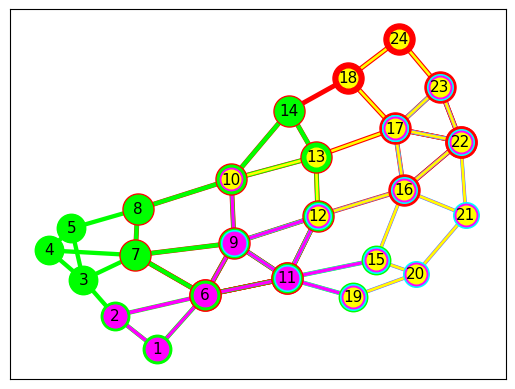

In [11]:
def visao_todas_ISPs(pos, topology, ISP_dict:dict, colors = [ (255/255,0/255,0/255), (0/255,255/255,0/255), (0/255,255/255,255/255), (255/255,0/255,255/255), (255/255,255/255,0/255)]):
    blue = (100/255,149/255,237/255)

    node_size = 500
    node_range = 400

    edge_width = 3.5
    edge_range = 2
    print(ISP_dict)
    #nx.draw_networkx_nodes(topology, pos, node_size=node_size, node_color=blue)
    #nx.draw_networkx_edges(topology, pos, edge_color=blue, width=edge_width)
    #ISP_dict = scramble_dict_keys(ISP_dict)
    #print(ISP_dict)
    for i, key in enumerate(ISP_dict.keys()):
            
            ISP_node_list = ISP_dict[key]["nodes"]
            ISP_edge_list = ISP_dict[key]["edges"]

            color = (np.random.rand(), np.random.rand(), np.random.rand())
            
            nx.draw_networkx_nodes(topology, pos, nodelist=ISP_node_list, node_size=(node_size-(i*node_range/len(ISP_dict))), node_color=colors[i])
            
            nx.draw_networkx_edges(topology, pos, node_size=200, edgelist=ISP_edge_list, edge_color=colors[i], width=(edge_width-(i*edge_range/len(ISP_dict))))
            print(ISP_node_list)
            
    nx.draw_networkx_labels(topology, pos, font_size=11, font_family="sans-serif")
    

pos = nx.spring_layout(topology, seed=7)
visao_todas_ISPs(pos, topology, ISP_dict)


{0: {'nodes': [], 'edges': []}, 1: {'nodes': [3, 4, 5], 'edges': [(2, 3), (3, 7), (3, 4), (3, 5), (7, 4), (4, 5), (5, 8), (14, 18)]}, 2: {'nodes': [1, 2, 7, 8, 14, 18, 24], 'edges': [(1, 2), (1, 6), (2, 6), (6, 7), (7, 9), (7, 8), (8, 10), (10, 14), (13, 14), (13, 17), (17, 18), (18, 24), (23, 24)]}, 3: {'nodes': [6, 13, 20, 21], 'edges': [(6, 9), (6, 11), (9, 10), (11, 19), (11, 15), (10, 13), (12, 13), (19, 20), (15, 16), (15, 20), (16, 21), (20, 21), (22, 21)]}, 4: {'nodes': [9, 11, 10, 19, 15, 16, 17, 22, 23], 'edges': [(9, 11), (9, 12), (11, 12), (12, 16), (16, 22), (16, 17), (17, 23), (17, 22), (22, 23)]}, 5: {'nodes': [12], 'edges': []}}
{0: {'nodes': [], 'edges': []}, 1: {'nodes': [3, 4, 5], 'edges': [(2, 3), (3, 7), (3, 4), (3, 5), (7, 4), (4, 5), (5, 8), (14, 18)]}, 2: {'nodes': [1, 2, 7, 8, 14, 18, 24], 'edges': [(1, 2), (1, 6), (2, 6), (6, 7), (7, 9), (7, 8), (8, 10), (10, 14), (13, 14), (13, 17), (17, 18), (18, 24), (23, 24)]}, 3: {'nodes': [6, 13, 20, 21], 'edges': [(6, 9

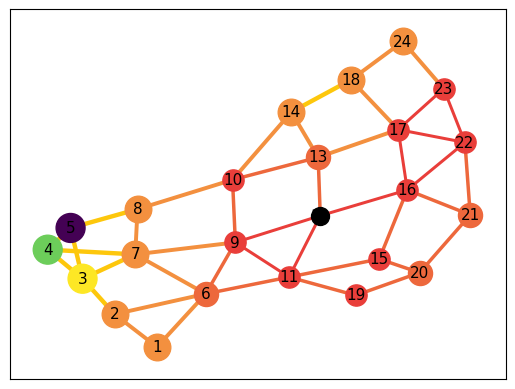

In [12]:

heatmap = determine_interssection(topology, ISP_dict)
colors = [(255/255,243/255,59/255), (253/255,199/255,12/255), (243/255,144/255,63/255), (237/255,104/255,60/255), (233/255,62/255,58/255), (0,0,0)]
visao_todas_ISPs(pos, topology, heatmap, colors)

[12]


d:\Desktop\Simulator\simulador-EON-pre-Desastre\.simulador_venv\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


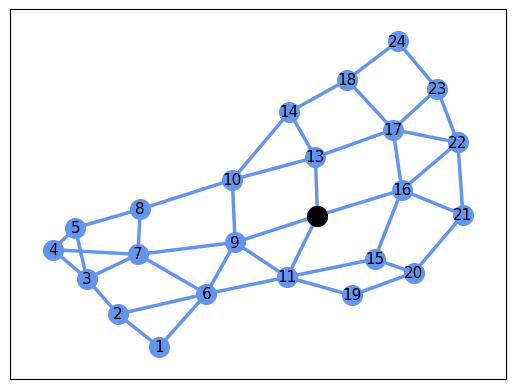

In [24]:
num = 5
visao_ISP(pos, topology, heatmap[num]["nodes"], heatmap[num]["edges"], True)

In [14]:
def disaster_generator(topology):
    disaster_center = np.random.choice(heatmap[5]["nodes"], 1)
    edges = list(topology.edges(disaster_center))
    index_list = [i for i in range(len(edges))]

    random_index = np.random.choice(index_list, len(index_list), replace=False)
    random_index = random_index[:max(random_index[0],3)]

    random_edges = [edges[i] for i in random_index]
    
    tempos = [ np.random.normal(600, 90) for i in range( len(random_edges)+len(disaster_center))]
    min_value = min(tempos)
    tempos_finais = [ x - min_value for x in tempos]
    duration = np.random.normal(600, 90)

    NODE_POINTS = [ [element, tempos_finais[i]] for i, element in enumerate(disaster_center)]
    LINK_POINTS = [ [x, y, tempos_finais[i + len(disaster_center)]] for i, (x,y) in enumerate(random_edges)]

    SORTED_NODE_POINTS = sorted(NODE_POINTS, key=lambda x: x[1])
    SORTED_LINK_POINTS = sorted(LINK_POINTS, key=lambda x: x[2])

    return {"nodes":SORTED_NODE_POINTS, "links":SORTED_LINK_POINTS, "duration":duration, "start":min_value}

disaster = disaster_generator(topology)

In [15]:
disaster

{'nodes': [[np.int64(12), 295.23563583240696]],
 'links': [[np.int64(12), 11, 0.0],
  [np.int64(12), 16, 28.734420563230174],
  [np.int64(12), 13, 232.82456414404135]],
 'duration': 684.9630523053236,
 'start': 515.3419527544988}

In [16]:
for key in ISP_dict.keys():
    
    ISP_dict[key]["databases_migration"] = {}
    for node in disaster["nodes"]:
        all_distances = nx.single_source_dijkstra_path_length(topology, node[0])
        ISP_distances = { key2:all_distances[key2] for key2 in ISP_dict[key]["nodes"]}
        most_distant_node = max(ISP_distances, key=ISP_distances.get)
        database = (node[0], most_distant_node)
        print(database)
        ISP_dict[key]["databases_migration"]["source"] = node[0]
        ISP_dict[key]["databases_migration"]["destination"] = node[1]
        ISP_dict[key]["databases_migration"]["size"] = np.random.normal(40000, 5000)
        
        ISP_dict[key]["reaction_time"] = np.random.normal(60, 20)

(np.int64(12), 24)
(np.int64(12), 5)
(np.int64(12), 19)
(np.int64(12), 19)
(np.int64(12), 19)


In [17]:
ISP_dict

{0: {'nodes': [np.int64(14),
   10,
   13,
   18,
   8,
   9,
   12,
   17,
   24,
   7,
   6,
   11,
   16,
   22,
   6,
   11,
   23,
   22],
  'edges': [(np.int64(14), 10),
   (np.int64(14), 13),
   (np.int64(14), 18),
   (10, 13),
   (10, 8),
   (10, 9),
   (13, 12),
   (13, 17),
   (18, 17),
   (18, 24),
   (8, 7),
   (9, 12),
   (9, 7),
   (9, 6),
   (9, 11),
   (9, 6),
   (9, 11),
   (12, 11),
   (12, 16),
   (12, 11),
   (17, 16),
   (17, 22),
   (17, 23),
   (17, 22),
   (24, 23),
   (7, 6),
   (7, 6),
   (6, 11),
   (6, 11),
   (11, 6),
   (16, 22),
   (16, 22),
   (22, 23),
   (6, 11),
   (23, 22)],
  'databases_migration': {'source': np.int64(12),
   'destination': 295.23563583240696,
   'size': 43176.47312244021},
  'reaction_time': 83.29987942487193},
 1: {'nodes': [np.int64(6),
   1,
   2,
   7,
   9,
   11,
   3,
   4,
   8,
   10,
   12,
   19,
   15,
   5,
   13,
   14],
  'edges': [(np.int64(6), 1),
   (np.int64(6), 2),
   (np.int64(6), 7),
   (np.int64(6), 9),
   (n

In [18]:

def node_and_link_to_ISP( topology, ISP_dict):

    node_dict = {node:[] for node in topology.nodes()}
    edge_dict = {edges:[] for edges in topology.edges()}
    
    for key in ISP_dict.keys():

        for node in ISP_dict[key]["nodes"]:
            node_dict[node].append(key)
        for edge in ISP_dict[key]["edges"]:
            if edge in edge_dict.keys():
                edge_dict[edge].append(key)
            elif (edge[1], edge[0]) in edge_dict.keys():
                edge_dict[(edge[1], edge[0])].append(key)

    return {"nodes":node_dict, "edges":edge_dict}
teste = node_and_link_to_ISP(topology, ISP_dict)

In [19]:
teste

{'nodes': {1: [1, 3],
  2: [1, 3, 3],
  6: [0, 0, 1, 3],
  3: [1],
  7: [0, 1],
  4: [1],
  5: [1],
  8: [0, 1],
  9: [0, 1, 2, 3],
  11: [0, 0, 1, 2, 3],
  10: [0, 1, 3, 4],
  12: [0, 1, 2, 3, 4],
  13: [0, 1, 4],
  14: [0, 1],
  19: [1, 2, 3, 4],
  15: [1, 2, 3, 4],
  16: [0, 2, 3, 4],
  17: [0, 2, 2, 3, 4],
  18: [0, 4],
  20: [2, 3, 4],
  22: [0, 0, 2, 3, 4],
  21: [2, 3, 4],
  23: [0, 2, 3, 4],
  24: [0, 4]},
 'edges': {(1, 2): [1, 3, 3],
  (1, 6): [1, 3],
  (2, 3): [1],
  (2, 6): [1, 3, 3],
  (6, 7): [0, 0, 1],
  (6, 9): [0, 0, 1, 3],
  (6, 11): [0, 0, 0, 0, 1, 3],
  (3, 7): [1],
  (3, 4): [1],
  (3, 5): [1],
  (7, 4): [1],
  (7, 9): [0, 1],
  (7, 8): [0, 1],
  (4, 5): [1],
  (5, 8): [1],
  (8, 10): [0, 1],
  (9, 10): [0, 1, 3],
  (9, 11): [0, 0, 1, 2, 3],
  (9, 12): [0, 1, 2, 3],
  (11, 19): [1, 2, 3],
  (11, 15): [1, 2, 3],
  (11, 12): [0, 0, 1, 2, 3],
  (10, 13): [0, 1, 4],
  (10, 14): [0, 1],
  (12, 13): [0, 1, 4],
  (12, 16): [0, 2, 3, 4],
  (13, 14): [0, 1],
  (13, 17): [0,

In [20]:
src_isp = np.random.choice( teste["nodes"][15])
dst_isp = np.random.choice( teste["nodes"][20])

print(src_isp)
print(dst_isp)

3
3


In [21]:
def selecionaCaminhosBruteForce():
    pass

In [22]:
def selecionaCaminho():
    pass

NameError: name 'DATABASES' is not defined

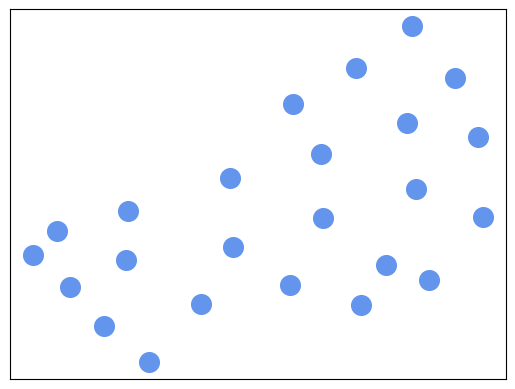

In [23]:
MOMENTODESASTRELINK = 2
MOMENTODESASTRENODE = 1
def pinta_grafo(topology: Graph, momento:int = LINK_POINTS[-1][-1]):
    copiatopo = topology.copy()
    blue = (100/255,149/255,237/255)
    colors = [ (1,0,0), (0,1,0), (0,0,1), (0.5, 0.8, 0.1)]

    links_a_serem_removidos = []
    nodes_a_serem_removidos = []
    
    for link in LINK_POINTS:
        if link[MOMENTODESASTRELINK] > momento:
            break
        links_a_serem_removidos.append(link)

    for node in NODE_POINTS:
        if node[MOMENTODESASTRENODE] > momento:
            break
        nodes_a_serem_removidos.append(node[0])
    pos = nx.spring_layout(copiatopo, seed=7)
    
    #copiatopo.remove_edges_from(links_a_serem_removidos)
    #copiatopo.remove_nodes_from(nodes_a_serem_removidos)
    
    
    nx.draw_networkx_nodes(copiatopo, pos, node_size=200, node_color=blue)

    for i, node in enumerate(DATABASES):
        nx.draw_networkx_nodes(copiatopo, pos,nodelist=node[:2], node_size=200, node_color=colors[i])

    nx.draw_networkx_edges(copiatopo, pos, node_size=200, edge_color=blue, width=2.5)
    nx.draw_networkx_labels(copiatopo, pos, font_size=11, font_family="sans-serif")
    

    paths_available = {}
    for database in DATABASES:
        key = (database[0], database[1])
        paths_available[key] = []
        for path in k_paths[key]:
            validPath = True
            for i in range( 0, len(path)-1):
                if not copiatopo.has_edge(path[i],path[i+1]):
                    validPath = False
                    break
            if (validPath):
                paths_available[key].append(path)
    
    caminhos_finais = {}
    # caminhos_finais = selecionaCaminhos()
    for key, paths in paths_available.items():
        first_path = paths[0]  # Selecting only the first path
        edges = [(first_path[i], first_path[i+1]) for i in range(len(first_path)-1)]
        caminhos_finais[key] = edges


    for i, key in enumerate(caminhos_finais):
        nx.draw_networkx_edges(copiatopo, pos, node_size=200,edgelist=caminhos_finais[key], edge_color=colors[i], width=2.5)


    for (src, dest) in copiatopo.edges:
        soma = 0
        for slot in copiatopo[src][dest]["capacity"]:
            if slot == 0:
                soma += 1
        copiatopo[src][dest]["livre"] = soma
    edge_labels = nx.get_edge_attributes(copiatopo, "livre")
    nx.draw_networkx_edge_labels(copiatopo, pos, edge_labels, font_size=5)
    

    return (copiatopo, caminhos_finais)
    
pinta_grafo(topology, 9)

In [ ]:
k_paths[(4,23)]